# Exercise 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

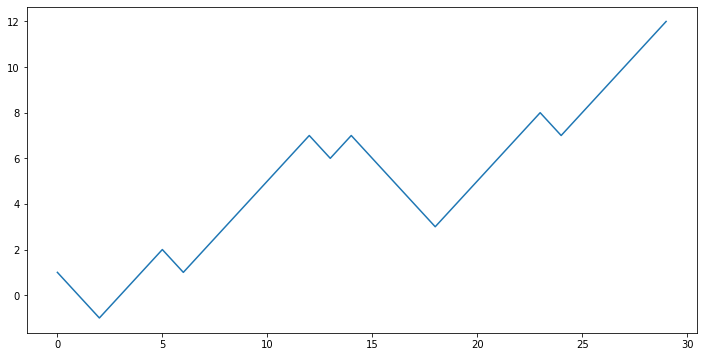

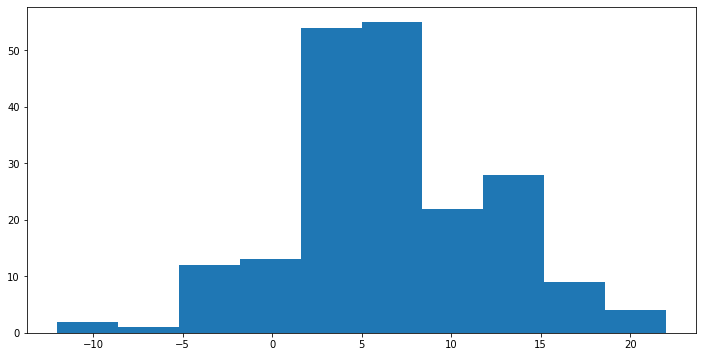

Mean: 6.47
Variance: 30.719100000000005


In [6]:
coin_flips = np.array(np.random.uniform(0, 1, size=30) < 0.6, dtype=int) * 2 - 1

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(coin_flips))

results = []
for i in range(200):
    coin_flips = np.array(np.random.uniform(0, 1, size=30) < 0.6, dtype=int) * 2 - 1
    final_position = sum(coin_flips)
    results.append(final_position)

plt.figure(figsize=(12, 6))
plt.hist(results)

plt.show()
print('Mean:', np.mean(results))
print('Variance:',np.var(results))

# Exercise 9

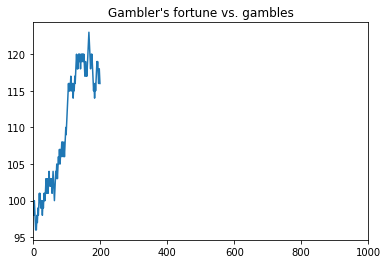

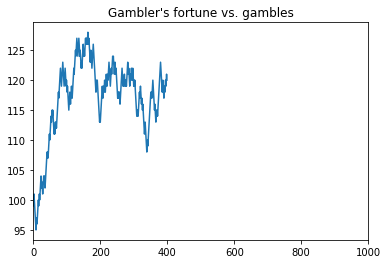

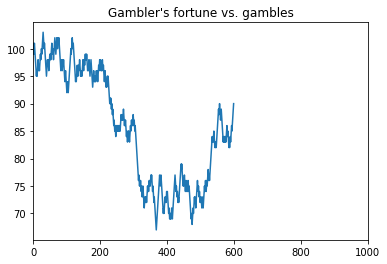

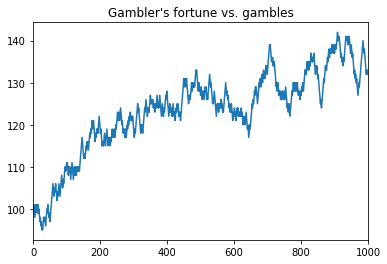

In [7]:
def gambler_ruin(upper_bound):
    gambler = 100 ## gambler's initial fortune
    house = 2000

    gambler_fortune = []
    num_gambles = upper_bound
    for i in range(upper_bound):
        trial = np.random.choice([1, -1], size=1, p = [0.5, 0.5])
        if trial ==1:
            gambler += 1
            house -+ 1
        else:
            gambler -= 1
            house += 1

        gambler_fortune.append(gambler)

        # end simulation earlier if either the gambler or the house go bankrupt
        if gambler == 0 or house == 0:
            num_gambles = i
            break

    plt.figure()
    plt.plot(range(num_gambles), gambler_fortune)
    plt.title("Gambler's fortune vs. gambles")
    plt.xlim(0, 1000)
    plt.show()

for gamble in [200, 400, 600, 1000]:
    gambler_ruin(gamble)

In [8]:
def gambler_ruin_trials(trials, 
                        gambler_initial_fortune=50, house_initial_fortune=2000, 
                        limit_games = 5000):

    gambler_fortune = []
    house_fortune = []
    games_until_bankrupcy = []

    for trial in range(trials):
        n_games = 0
        gaming = True
        gambler = gambler_initial_fortune
        house = house_initial_fortune
        while gaming:
            n_games +=1
            trial = np.random.choice([1, -1], size=1, p = [0.5, 0.5])
            if trial ==1:
                gambler += 1
                house -= 1
            else:
                gambler -= 1
                house += 1
        # end simulation earlier if either the gambler or the house go bankrupt
            if gambler == 0 or house == 0:
                gaming = False
            if n_games == limit_games:
                gaming = False

        gambler_fortune.append(gambler)
        house_fortune.append(house)
        games_until_bankrupcy.append(n_games)

    plt.figure()
    plt.hist(games_until_bankrupcy, color='orange', bins=20)
    plt.title('Number of games until bankrupcy with an original fortune of ' + str(gambler_initial_fortune))
    plt.show()
    return gambler_fortune, house_fortune, games_until_bankrupcy

In [ ]:
gambler_fortune_10, house_fortune_10, games_until_bankrupcy_10 = gambler_ruin_trials(1000, gambler_initial_fortune=100)
np.mean(games_until_bankrupcy_10)